# Data Preparation

## Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Data Loading

In [2]:
# Load datasets
movies = pd.read_csv('assets\movie\movies.csv')
ratings = pd.read_csv('assets\movie\\ratings.csv')

# Content Based Filtering

## Data Preprocessing

### Menyalin dataset movie

In [3]:
# Mengcopy dataset movie
movies_df = movies.copy()

### Membuat kolom baru berdasarkan genre

In [4]:
# Membuat kolom baru untuk setiap genre
genres = set()
for genre_string in movies_df['genres']:
    genres.update(genre_string.split('|'))

# Inisialisasi kolom dengan nilai 0
for genre in genres:
    movies_df[genre] = 0

# Mengisi nilai kolom baru
for index, row in movies_df.iterrows():
    for genre in row['genres'].split('|'):
        movies_df.at[index, genre] = 1

### Menghapus kolom yang tidak memiliki genre

In [5]:
# Menghapus baris yang tidak memiliki genre
movies_df = movies_df[movies_df['genres'] != '(no genres listed)']

### Menampilkan data yang sudah diolah

In [6]:
# Menampilkan dataset
movies_df

,movieId,title,genres,War,IMAX,Romance,Musical,Action,Horror,Documentary,...,Crime,(no genres listed),Animation,Drama,Children,Adventure,Comedy,Fantasy,Thriller,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Menghapus kolom yang tidak diperlukan

In [7]:
movies_df.drop('(no genres listed)', axis=1, inplace=True)

### Menampilkan kolom pada data

In [8]:
movies_df.columns

Index(['movieId', 'title', 'genres', 'War', 'IMAX', 'Romance', 'Musical',
       'Action', 'Horror', 'Documentary', 'Sci-Fi', 'Mystery', 'Western',
       'Crime', 'Animation', 'Drama', 'Children', 'Adventure', 'Comedy',
       'Fantasy', 'Thriller', 'Film-Noir'],
      dtype='object')

## Model Development

### Menghitung cosine similarity

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
# Hitung similarity score
similarity_matrix = cosine_similarity(movies_df.iloc[:, 3:])  # Menghitung similarity score dari kolom genre

### Membuat fungsi untuk rekomendasi

In [10]:
# Buat fungsi untuk mendapatkan rekomendasi
def get_recommendations(movie_title, similarity_matrix=similarity_matrix, movies_df=movies_df, top_n=10):
    idx = movies_df.index[movies_df['title'] == movie_title].tolist()[0] # Dapatkan indeks film berdasarkan judul
    similarity_scores = list(enumerate(similarity_matrix[idx])) # Dapatkan similarity scores dari film dengan film lainnya
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True) # Urutkan similarity scores dari yang tertinggi
    top_similar_movies = similarity_scores[1:top_n+1] # Ambil top N film yang paling mirip
    recommended_movies = [(movies_df.iloc[movie[0]]['title'], movie[1]) for movie in top_similar_movies] # Dapatkan judul dari film-film yang direkomendasikan
    
    return recommended_movies

### Simulasi penggunaan sistem rekomendasi

In [11]:
# Memilih judul film secara acak dari dataset
random_movie_title = random.choice(movies_df['title'])
random_movie_genre = movies_df.loc[movies_df['title'] == random_movie_title, 'genres'].values[0]

# Mendapatkan rekomendasi untuk film tersebut
recommendations = get_recommendations(random_movie_title, similarity_matrix, movies_df)

# Menampilkan judul dan genre dari film yang direkomendasikan
print(f"Judul: {random_movie_title}")
print(f"Genre: {random_movie_genre}")
print("======"*7)
print("TOP 10 REKOMENDASI FILM")
print("======"*7)
print
number = 1
for movie, score in recommendations:
    genres = movies_df[movies_df['title'] == movie]['genres'].values[0]
    print(f"{number}.) {movie}, Genre: {genres})")
    number+=1

Judul: Stop Making Sense (1984)
Genre: Documentary|Musical
TOP 10 REKOMENDASI FILM
1.) Buena Vista Social Club (1999), Genre: Documentary|Musical)
2.) Stop Making Sense (1984), Genre: Documentary|Musical)
3.) U2: Rattle and Hum (1988), Genre: Documentary|Musical)
4.) Decline of Western Civilization, The (1981), Genre: Documentary|Musical)
5.) Standing in the Shadows of Motown (2002), Genre: Documentary|Musical)
6.) Monterey Pop (1968), Genre: Documentary|Musical)
7.) Sympathy for the Devil (1968), Genre: Documentary|Musical)
8.) Anvil! The Story of Anvil (2008), Genre: Documentary|Musical)
9.) Pearl Jam Twenty (2011), Genre: Documentary|Musical)
10.) Secret Policeman's Other Ball, The (1982), Genre: Comedy|Documentary|Musical)


# Collaborative Filtering

## Cluster Based Algorithm

### Data Preprocessing

#### Melakukan import library yang dibutuhkan

In [12]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#### Menggabungkan dataset ratings dan movies

In [13]:
# Menggabungkan dataset ratings dan movies
data = pd.merge(ratings, movies, on='movieId')

#### Membuat pivot table untuk user-item

In [14]:
# Membuat pivot table untuk user-item
user_item_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')

#### Mengisi nilai null dengan 0

In [15]:
# Mengisi nilai null dengan 0
user_item_matrix = user_item_matrix.fillna(0)

#### Menampilkan matrix rating

In [16]:
# Menampilkan user-item matrix
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model development

#### Membuat pipeline

In [17]:
# Menggunakan Pipeline untuk menangani proses normalisasi dan clustering 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

#### Membuat parameter untuk dilakukan hyperparameter tuning

In [18]:
# Mengatur parameter untuk grid search
param_grid = {
    'kmeans__n_clusters': list(range(5, 21)),
    'kmeans__init': ['random'], 
    'kmeans__n_init': [5, 10, 15],  
    'kmeans__max_iter': [100, 150, 200], 
    'kmeans__tol': [0.00001, 0.0001, 0.001],  
    'kmeans__random_state': [42]  
}

#### Melakukan hyperparameter tuning dengan metode GridSearch

In [19]:
# Melakukan grid search untuk menemukan parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_search.fit(user_item_matrix)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.9s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.6s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.6s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=0.0001; total time=   0.5s
[CV] 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__init': ['random'],
                         'kmeans__max_iter': [100, 150, 200],
                         'kmeans__n_clusters': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                14, 15, 16, 17, 18, 19, 20],
                         'kmeans__n_init': [5, 10, 15],
                         'kmeans__random_state': [42],
                         'kmeans__tol': [1e-05, 0.0001, 0.001]},
             verbose=2)

#### Mendapatkan parameter terbaik

In [20]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 18, 'kmeans__n_init': 10, 'kmeans__random_state': 42, 'kmeans__tol': 1e-05}
Best Score: -1388923.7242022362


#### Melakukan clustering dengan parameter terbaik

In [21]:
# Melakukan clustering dengan parameter terbaik
best_kmeans = KMeans(n_clusters=best_params['kmeans__n_clusters'], init=best_params['kmeans__init'])
clusters = best_kmeans.fit_predict(user_item_matrix)

c:\Users\harry\anaconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Menambahkan kolom 'cluster' pada matrix

In [22]:
# Menambahkan kolom 'cluster' pada user_item_matrix
user_item_matrix['cluster'] = clusters

#### Membuat fungsi rekomendasi film

In [23]:
# Membuat fungsi untuk mendapatkan rekomendasi
def recommend_movies_kmeans(user_id, num_recommendations=10):
    user_cluster = user_item_matrix.loc[user_id]['cluster']
    cluster_movies = user_item_matrix[user_item_matrix['cluster'] == user_cluster].drop(columns='cluster')
    user_ratings = user_item_matrix.loc[user_id].drop('cluster')
    recommended_movies = cluster_movies.mean().sort_values(ascending=False)
    already_rated = user_ratings[user_ratings > 0].index
    recommended_movies = recommended_movies.drop(already_rated)
    recommended_movies = recommended_movies.reset_index()
    recommended_movies = pd.merge(recommended_movies, movies, left_on='movieId', right_on='movieId')
    
    return recommended_movies[['movieId', 'title', 'genres']].head(num_recommendations)

#### Simulasi penggunaan sistem rekomendasi

In [24]:
# Contoh penggunaan sistem rekomendasi film
user_id = np.random.randint(1, user_item_matrix.shape[0] + 1)
recommendations = recommend_movies_kmeans(user_id)
print("TOP 10 REKOMENDASI FILM UNTUK USER", user_id, ":")
recommendations


TOP 10 REKOMENDASI FILM UNTUK USER 123 :


,movieId,title,genres
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War
1,527,Schindler's List (1993),Drama|War
2,858,"Godfather, The (1972)",Crime|Drama
3,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
4,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,2028,Saving Private Ryan (1998),Action|Drama|War
7,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery
8,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...
9,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Deep Learning

### Data Preprocessing

#### Melakukan import library yang dibutuhkan

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

C:\Users\harry\AppData\Local\Temp\ipykernel_22860\3755931955.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


#### Menggabungkan dataset

In [26]:
# Menyiapkan dataset
data_dl = pd.merge(ratings, movies, on='movieId')

#### Menampilkan dataset

In [27]:
# Menampilkan dataset
data_dl

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


#### Melakukan proses encoding pada userId

In [28]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = data_dl['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599,

#### Melakukan proses encoding pada movieId

In [29]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = data_dl['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

#### Melakukan mapping pada data

In [30]:
# Mapping userID ke dataframe user
data_dl['user'] = data_dl['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
data_dl['movie'] = data_dl['movieId'].map(movie_to_movie_encoded)

#### Mencari jumlah user dan movie serta nilai maksimum dan minimum rating

In [31]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
data_dl['rating'] = data_dl['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['rating'])

# Nilai maksimal rating
max_rating = max(data['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


#### Melakukan teknik one-hot encoding

In [32]:
# Melakukan one-hot encoding user dan movie
user_encoded = pd.get_dummies(data_dl['user'], prefix='user')
movie_encoded = pd.get_dummies(data_dl['movie'], prefix='movie')

# Menggabungkan user dan movie
encoded_data = pd.concat([user_encoded, movie_encoded], axis=1)

#### Membuat variabel x dan y

In [33]:
# Membuat variabel input X
X = encoded_data.values
# Membuat variabel y untuk membuat rating dari hasil
y = data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

#### Membagi dataset untuk training dan testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model development

#### Membangun model

In [35]:
# Definisikan model
from kerastuner import HyperModel

class RecommenderHyperModel(HyperModel):
    def __init__(self, num_users, num_movies):
        self.num_users = num_users
        self.num_movies = num_movies

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=self.num_users + self.num_movies))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                      loss=MeanSquaredError(),
                      metrics=[RootMeanSquaredError()])

        return model

#### Membuat fungsi callback

In [36]:
# Membuat ThresholdLossCallback
class ThresholdLossCallback(Callback):
    def __init__(self, threshold):
        super(ThresholdLossCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('root_mean_squared_error') is not None and logs.get('root_mean_squared_error') < self.threshold:
            print(f"\nTraining stopped as root_mean_squared_error ({logs.get('root_mean_squared_error'):.4f}) has reached the threshold ({self.threshold})")
            self.model.stop_training = True

rmse_threshold_callback = ThresholdLossCallback(threshold=0.01)

In [37]:
# Fungsi callback yang digunakan
callbacks = [
    EarlyStopping(monitor='root_mean_squared_error', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='root_mean_squared_error', save_best_only=True, verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001, verbose=1), #
    rmse_threshold_callback
]

#### Melakukan hyperparameter tuning

In [38]:
# Melakukan hyperparameter tuning
from kerastuner.tuners import RandomSearch

hypermodel = RecommenderHyperModel(num_users, num_movie)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='recommender_system'
)

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             batch_size=128,
             validation_data=(X_test, y_test))

Reloading Tuner from my_dir\recommender_system\tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


#### Membuat model dari hyperparameter terbaik

In [39]:
# Mengambil model terbaik dari hyperparameter tuning
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                330720    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 331,809
Trainable params: 331,809
Non-trainable params: 0
_________________________________________________________________


#### Mengcompile dan training model

In [40]:
# Compile dan latih model terbaik
best_model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                   loss=MeanSquaredError(),
                   metrics=[RootMeanSquaredError()])

history = best_model.fit(X_train, y_train,
                         epochs=100,
                         validation_data=(X_test, y_test),
                         callbacks=callbacks,
                         batch_size=128)

Epoch 1/100
705/709 [============================>.] - ETA: 0s - loss: 0.0321 - root_mean_squared_error: 0.1791
Epoch 1: root_mean_squared_error improved from inf to 0.17912, saving model to best_model.h5
709/709 [==============================] - 6s 8ms/step - loss: 0.0321 - root_mean_squared_error: 0.1791 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1896 - lr: 0.0010
Epoch 2/100
706/709 [============================>.] - ETA: 0s - loss: 0.0295 - root_mean_squared_error: 0.1717
Epoch 2: root_mean_squared_error improved from 0.17912 to 0.17164, saving model to best_model.h5
709/709 [==============================] - 5s 8ms/step - loss: 0.0295 - root_mean_squared_error: 0.1716 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906 - lr: 0.0010
Epoch 3/100
705/709 [============================>.] - ETA: 0s - loss: 0.0268 - root_mean_squared_error: 0.1636
Epoch 3: root_mean_squared_error improved from 0.17164 to 0.16360, saving model to best_model.h5
709/709 [====================

#### Visualisasi Root Mean Squared Error (RMSE)

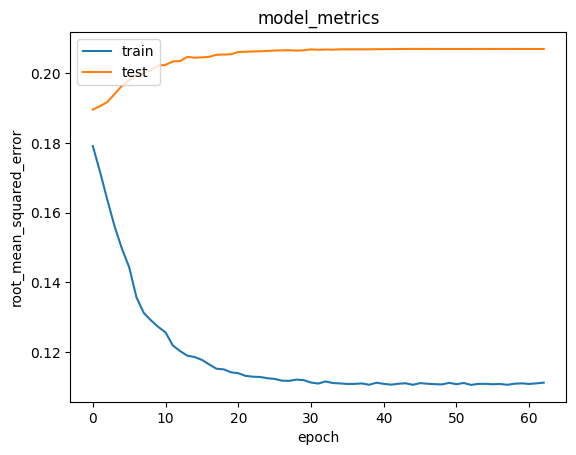

In [41]:
# Membuat plot grafik metrics
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Mempersiapkan data movies dengan id yang baru

In [42]:
# Membuat kolom ID baru dengan hasil encoding movieId
movies['new_movieId'] = movies['movieId'].map(movie_to_movie_encoded)

# Menangani nilai non-finite dengan menggantinya dengan nilai -1
movies['new_movieId'] = movies['new_movieId'].fillna(-1)

# Mengonversi kolom ke tipe data integer
movies['new_movieId'] = movies['new_movieId'].astype(int)

# Tampilkan data movies setelah penambahan kolom ID baru dan penghapusan nilai kosong
movies[['movieId', 'title', 'new_movieId']]

,movieId,title,new_movieId
0,1,Toy Story (1995),0
1,2,Jumanji (1995),481
2,3,Grumpier Old Men (1995),1
3,4,Waiting to Exhale (1995),482
4,5,Father of the Bride Part II (1995),483
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),5487
9738,193583,No Game No Life: Zero (2017),5488
9739,193585,Flint (2017),5489
9740,193587,Bungo Stray Dogs: Dead Apple (2018),5490


#### Membuat fungsi untuk mendapatkan rekomendasi

In [43]:
# Membuat fungsi untuk rekomendasi
def recommend_movies_dl(user_id,n):
    unwatched_movies = data_dl[data_dl['user'] != user_id]['movie'].unique() # Filter film-film yang belum ditonton oleh pengguna
    user_input = np.array([user_to_user_encoded[user_id]] * len(unwatched_movies)) # Buat input untuk model berdasarkan pengguna yang akan direkomendasikan dan film-film yang belum ditonton
    movie_input = np.array(unwatched_movies)
    user_encoded_input = tf.keras.utils.to_categorical(user_input, num_classes=num_users) # Buat one-hot encoded input untuk user
    movie_encoded_input = tf.keras.utils.to_categorical(movie_input, num_classes=num_movie) # Buat one-hot encoded input untuk movie
    X_recommend = np.concatenate((user_encoded_input, movie_encoded_input), axis=1) # Gabungkan kedua input
    predicted_ratings = best_model.predict(X_recommend).flatten() # Prediksi rating untuk film-film yang belum ditonton
    unwatched_movie_ids = [movie_encoded_to_movie[movie_id] for movie_id in movie_input] # Filter film-film yang sudah ditonton oleh pengguna
    unwatched_movies_df = movies[movies['new_movieId'].isin(unwatched_movie_ids)] # Buat DataFrame untuk film-film yang belum ditonton
    
    # Gabungkan data rating yang diprediksi dengan data film-film yang belum ditonton
    recommendations = pd.DataFrame({'movieId': unwatched_movie_ids, 'predicted_rating': predicted_ratings})
    recommendations = pd.merge(recommendations, unwatched_movies_df, on='movieId')
    # Urutkan film-film berdasarkan prediksi rating tertinggi
    top_n_recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head(n) 

    return top_n_recommendations.reset_index(drop=True)

#### Penggunaan sistem rekomendasi

In [44]:
# Menentukan pengguna yang akan direkomendasikan
user_id = random.choice(user_ids)
# Melakukan rekomendasi
recommendations = recommend_movies_dl(user_id,10)
print(f"Top 10 Film Rekomendasi Untuk User {user_id}:")
recommendations[['movieId','title', 'genres']]	

304/304 [==============================] - 1s 2ms/step
Top 10 Film Rekomendasi Untuk User 53:


,movieId,title,genres
0,7121,Adam's Rib (1949),Comedy|Romance
1,3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
2,131237,What Men Talk About (2010),Comedy
3,136447,George Carlin: You Are All Diseased (1999),Comedy
4,173351,Wow! A Talking Fish! (1983),Animation|Children|Comedy|Fantasy
5,6442,Belle époque (1992),Comedy|Romance
6,78836,Enter the Void (2009),Drama
7,95175,Front of the Class (2008),Drama
8,163072,Winnie Pooh (1969),Animation|Children
9,159811,The Bremen Town Musicians (1969),Animation|Drama|Fantasy
